In [26]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
# Загружаем датасет
digits = load_digits()
X, y = digits.data, digits.target

In [28]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [29]:
# Обучаем модель (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Делаем предсказания и оцениваем качество
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.9537


In [31]:
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric="mlogloss")

In [32]:
model.fit(X_train, y_train)

c:\Users\Alexey\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:53:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
y_pred = model.predict(X_test)

# Оцениваем точность
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9286


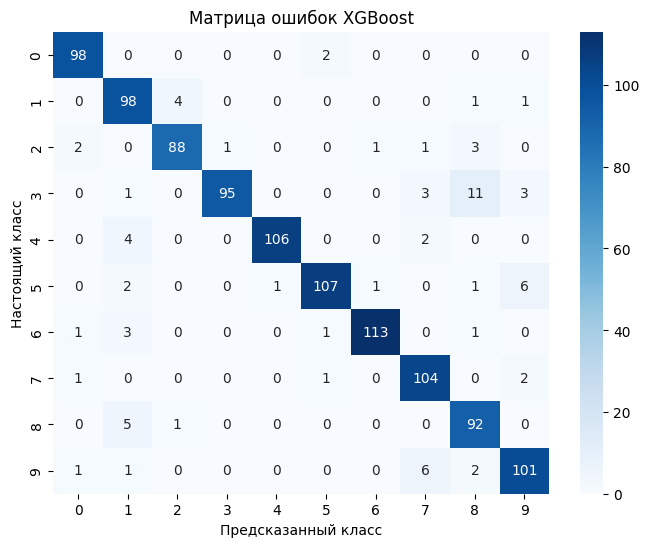

In [34]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Предсказанный класс")
plt.ylabel("Настоящий класс")
plt.title("Матрица ошибок XGBoost")
plt.show()

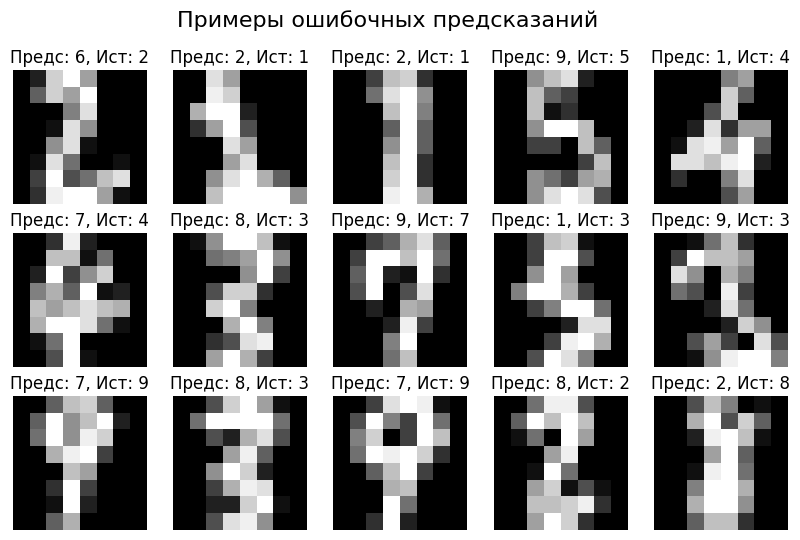

In [35]:
errors = np.where(y_pred != y_test)[0]

# Выведем несколько ошибочных примеров
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
fig.suptitle("Примеры ошибочных предсказаний", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < len(errors):
        idx = errors[i]
        ax.imshow(X_test[idx].reshape(8, 8), cmap="gray")
        ax.set_title(f"Предс: {y_pred[idx]}, Ист: {y_test[idx]}")
        ax.axis("off")

plt.show()